In [282]:
from pathlib import Path
import os

path = Path('.').absolute() 
os.chdir(path)
data_dir = path / 'data'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_train = pd.read_csv(data_dir / 'train.csv')
df_test  = pd.read_csv(data_dir / 'test.csv')

In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='YlGnBu')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
pd.crosstab([df_train['Sex'], df_train['Survived']], df_train['Pclass'], margins=True).style.background_gradient(cmap='YlGnBu')

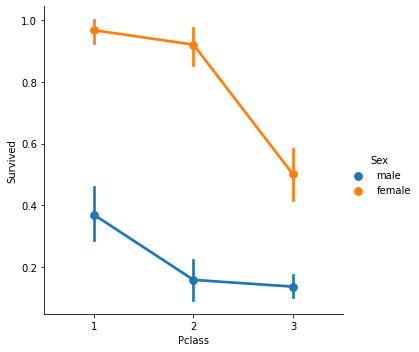

In [18]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point')

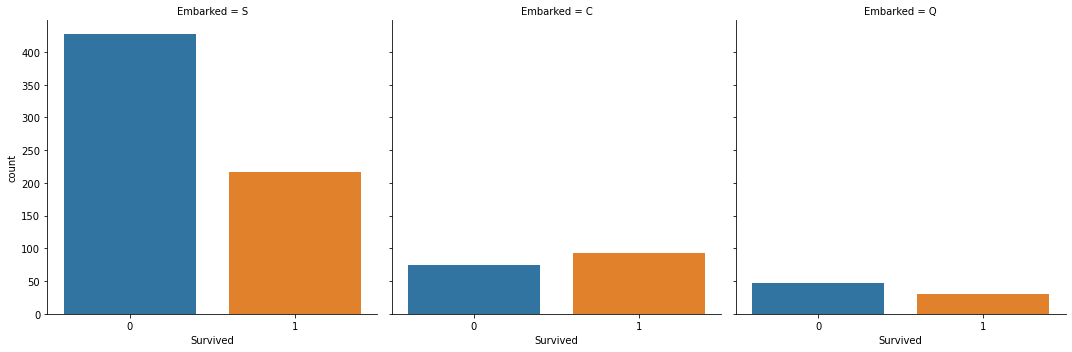

In [21]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train)

In [ ]:
pd.crosstab([df_train[''])

/opt/homebrew/Caskroom/miniforge/base/envs/pytest/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


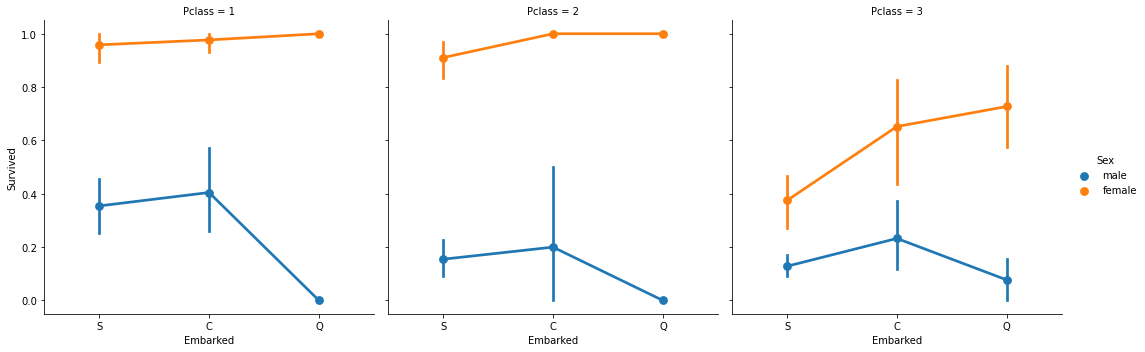

In [23]:
sns.catplot('Embarked', 'Survived', col='Pclass', hue='Sex', kind='point', data=df_train)

In [173]:
pd.crosstab([df_train['Survived']], [df_train['Embarked'], df_train['Sex'], df_train['Pclass']], margins=True).style.background_gradient(cmap='YlGnBu')

In [48]:
df_train['Age_bin'] = df_train.loc[df_train['Age'].isna()==False, 'Age'].apply(lambda age: int(age // 10))
df_test['Age_bin'] = df_test.loc[df_test['Age'].isna()==False, 'Age'].apply(lambda age: int(age // 10))

In [58]:
df_train['Age_bin'] = np.where(df_train['Age_bin'] >=7, 7, df_train['Age_bin'])
df_test['Age_bin'] = np.where(df_test['Age_bin'] >=7, 7, df_test['Age_bin'])

In [50]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [62]:
pd.crosstab([df_train['Age_bin'], df_train['Sex']], df_train['Survived'])

Survived          0   1
Age_bin Sex            
0.0     female   11  19
        male     13  19
1.0     female   11  34
        male     50   7
2.0     female   20  52
        male    123  25
3.0     female   10  50
        male     84  23
4.0     female   10  22
        male     45  12
5.0     female    2  16
        male     26   4
6.0     female    0   4
        male     13   2
7.0     male      6   1

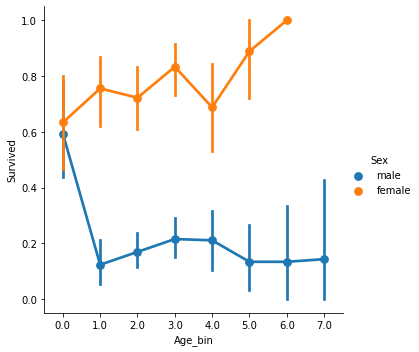

In [63]:
sns.catplot('Age_bin', 'Survived', hue='Sex', kind='point', data=df_train)

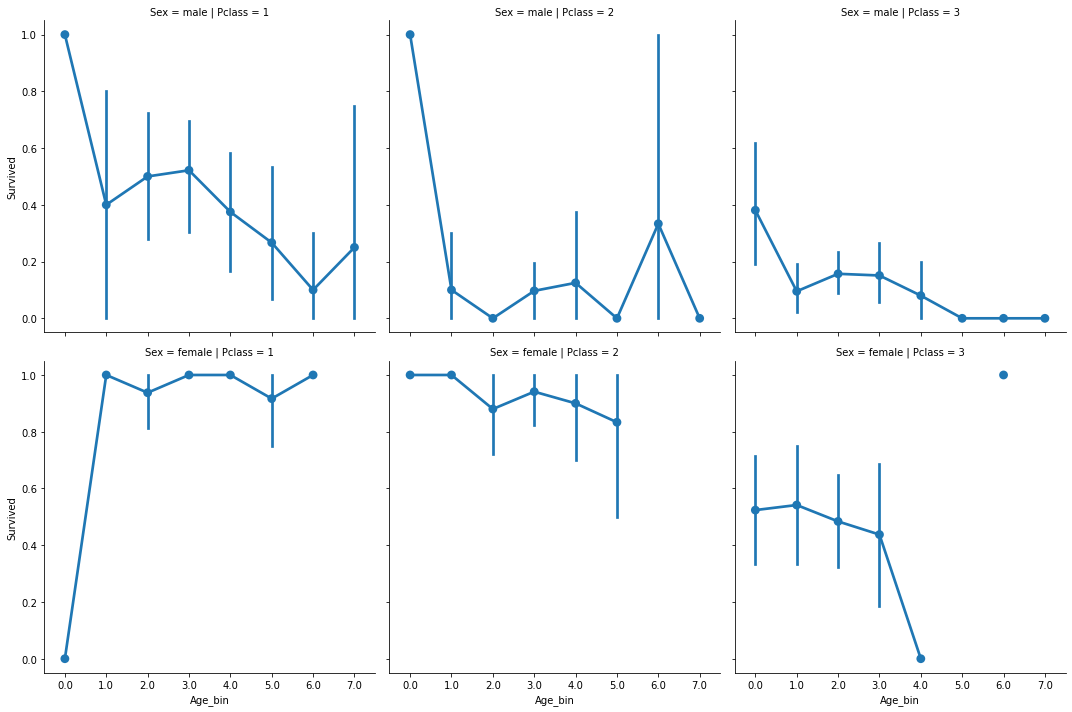

In [64]:
sns.catplot('Age_bin', 'Survived', col='Pclass', row='Sex', kind='point', data=df_train)

In [65]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='YlGnBu')

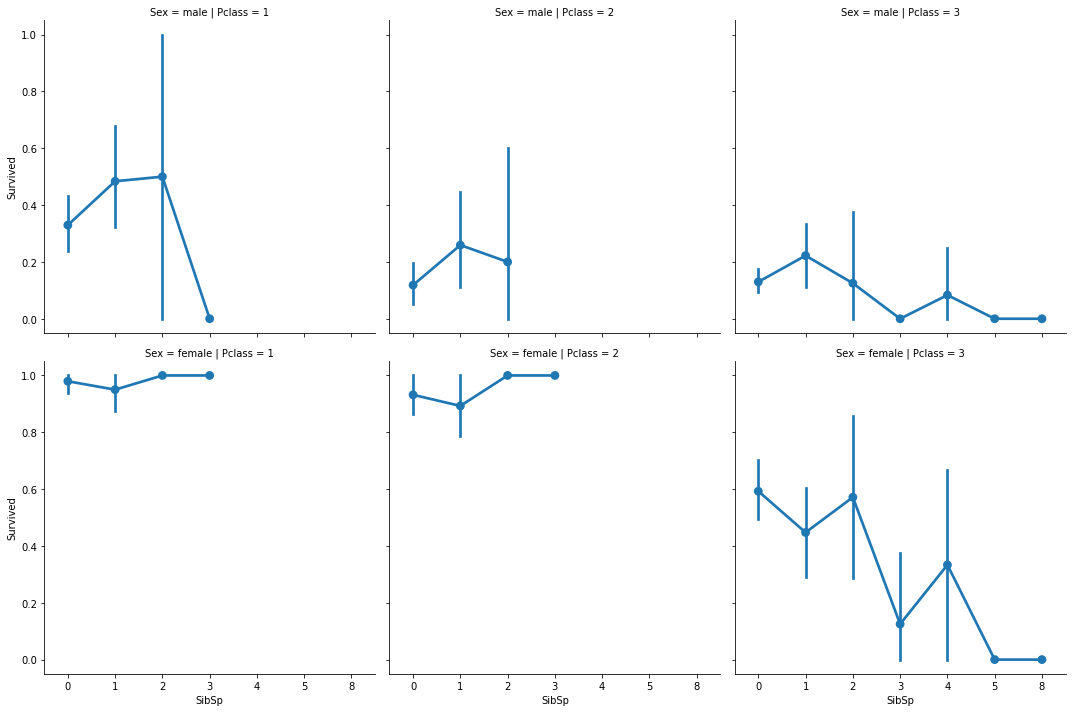

In [66]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [67]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='YlGnBu')

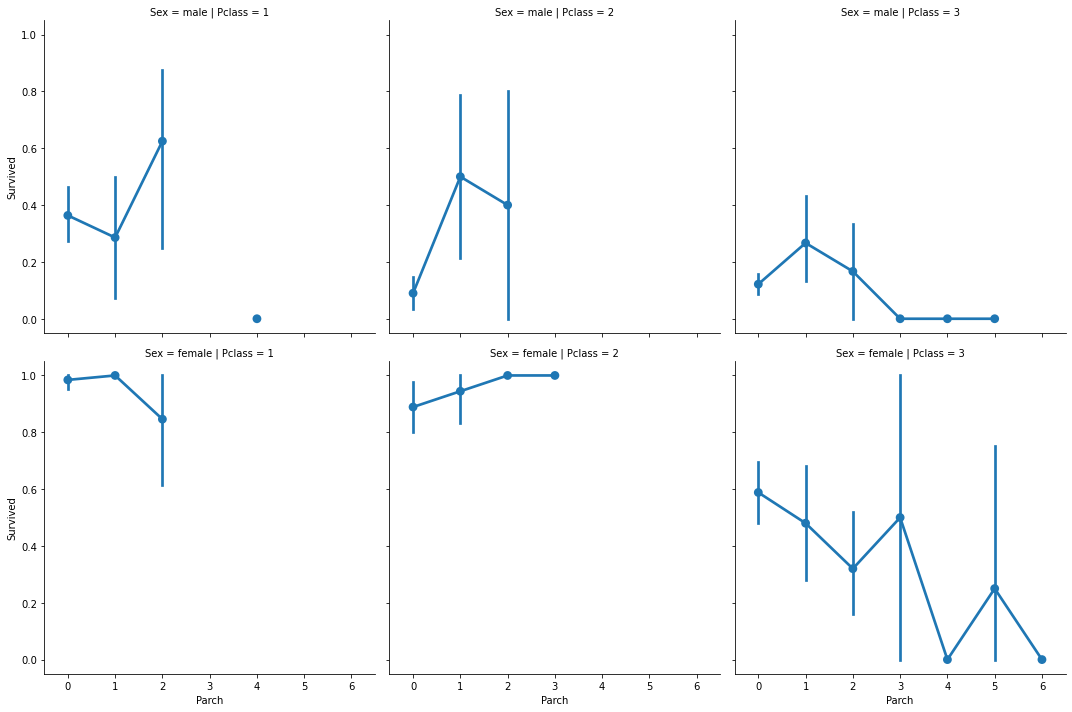

In [68]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);


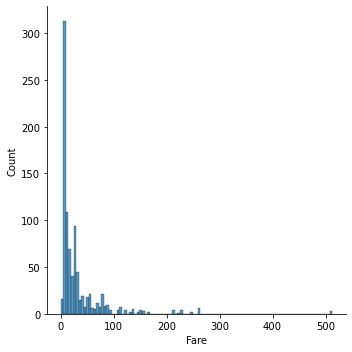

In [69]:
sns.displot(df_train['Fare'])

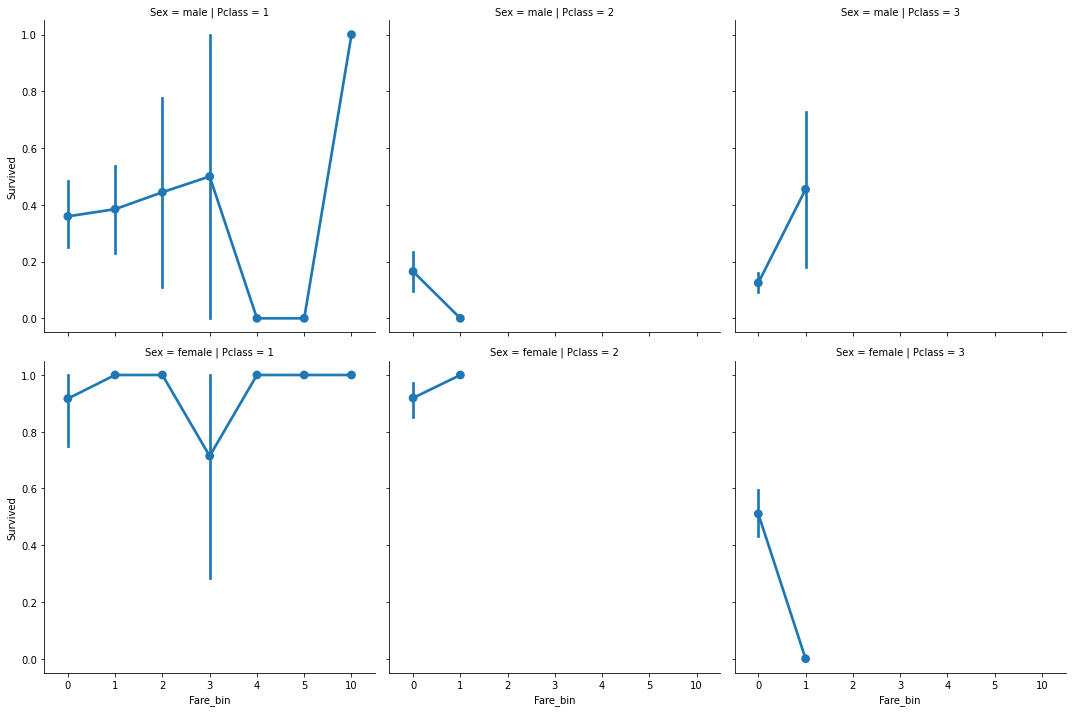

In [73]:
fare_bin_= 50
df_train['Fare_bin'] = df_train.loc[df_train['Fare'].isna()==False, 'Fare'].apply(lambda fare: int(fare // fare_bin_))
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [83]:
df_train['Relatives'] = df_train['SibSp'] + df_train['Parch']
df_train['Alone'] = df_train['Relatives'].apply(lambda rel: not bool(rel))

/opt/homebrew/Caskroom/miniforge/base/envs/pytest/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


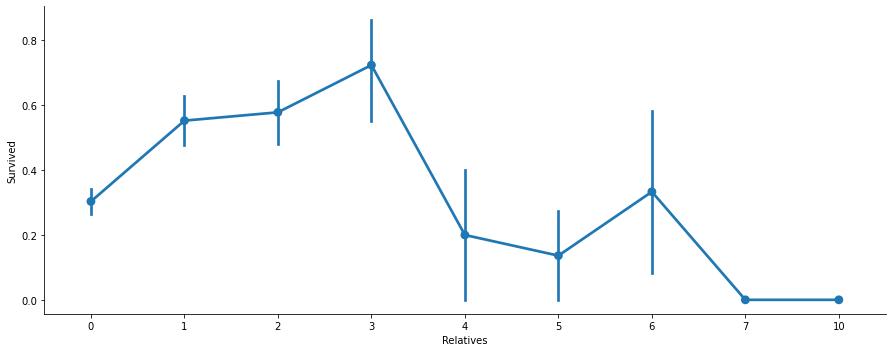

In [85]:
sns.factorplot('Relatives', 'Survived', data=df_train, aspect=2.5)

In [86]:
pd.crosstab(df_train['Alone'], df_train['Survived'], margins=True).style.background_gradient(cmap='YlGnBu')

Survived,0,1,All
Alone,,,
False,175,179,354
True,374,163,537
All,549,342,891


In [93]:
set([c[0] for c in df_train['Cabin'].unique() if not isinstance(c, float)])
set([c[0] for c in df_test['Cabin'].unique() if not isinstance(c, float)])

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Age_bin      332 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [99]:
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [110]:
df_train['Cabin_Letter'] = df_train['Cabin'].apply(lambda c: c[0] if not isinstance(c, float) else np.nan)
df_train.loc[df_train['Cabin'].isna(), 'Cabin_Letter'] = 'U'
pd.crosstab(df_train['Cabin_Letter'], df_train['Survived'], margins=True).style.background_gradient(cmap='YlGnBu')

Survived,0,1,All
Cabin_Letter,,,
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
T,1,0,1
U,481,206,687


In [116]:
print(df_train.groupby('Cabin_Letter').agg({'Survived': 'mean'}).to_markdown())

| Cabin_Letter   |   Survived |
|:---------------|-----------:|
| A              |   0.466667 |
| B              |   0.744681 |
| C              |   0.59322  |
| D              |   0.757576 |
| E              |   0.75     |
| F              |   0.615385 |
| G              |   0.5      |
| T              |   0        |
| U              |   0.299854 |


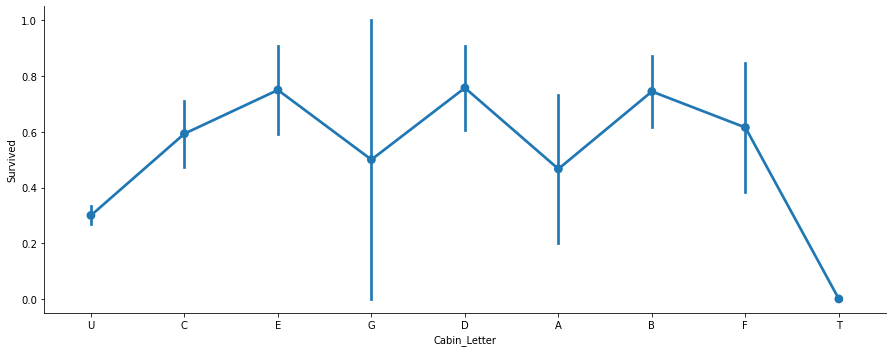

In [111]:
sns.catplot('Cabin_Letter', 'Survived', data=df_train, kind='point', aspect=2.5)

In [123]:
import re
df_train.loc[df_train['Ticket'].str.contains(r'[a-zA-Z]'), 'Ticket'].apply(lambda t: t.split()[0]).unique()

array(['A/5', 'PC', 'STON/O2.', 'PP', 'A/5.', 'C.A.', 'A./5.', 'SC/Paris',
       'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.',
       'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [163]:
df_train['Ticket_str'] = df_train['Ticket'].str.contains(r'[a-zA-Z]')

In [164]:
pd.crosstab(df_train['Ticket_str'], df_train['Survived'], margins=True).style.background_gradient(cmap='YlGnBu')

Survived,0,1,All
Ticket_str,,,
False,407,254,661
True,142,88,230
All,549,342,891


In [168]:
df_train.groupby('Ticket_str').agg({'Survived': 'mean'})

,Survived
Ticket_str,
False,0.384266
True,0.382609


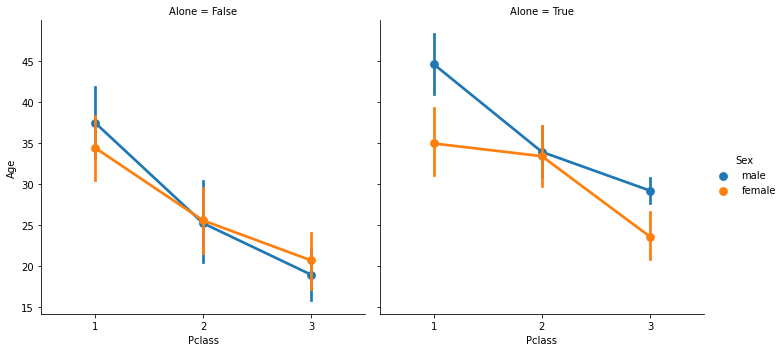

In [191]:
sns.catplot('Pclass', 'Age', col='Alone', hue='Sex', kind='point', data=df_train)

In [237]:
df_train['Age'] = df_train['Age'].fillna(df_train.groupby(['Alone', 'Sex', 'Pclass'])['Age'].transform('mean'))

In [334]:
words = [i for n in df_train['Name'].values for i in n.split()]
w_cnt = {w: words.count(w) for w in words if words.count(w) > 5}
w_cnt_sort = sorted(w_cnt.items(), key=lambda x: x[1], reverse=True)[:10]
w_survived = {w[0]: df_train.loc[df_train['Name'].str.contains(w[0]), 'Survived'].mean() for w in w_cnt_sort}
title = ['Mr', 'Miss', 'Mrs', 'Master']
df_train['Title'] = np.nan
for t in title:
    df_train.loc[df_train['Name'].str.contains(t), 'Title'] = t
df_train['Title'] = df_train['Title'].fillna('Unknown')


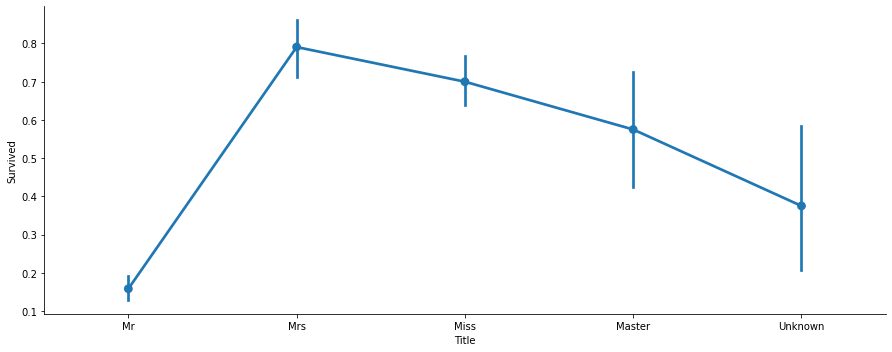

In [338]:
sns.catplot('Title', 'Survived', data=df_train, kind='point', aspect=2.5)

In [246]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [252]:
from src.model import ModelPredictbySex 

In [254]:
from src.preprocess import preprocess

In [256]:
dataset = list(map(preprocess, load_dataset()))

In [344]:
df = preprocess(load_dataset()[0])


In [347]:
from sklearn.model_selection import train_test_split

In [350]:
from src.model import ModelPredictbySex
model = ModelPredictbySex()

In [353]:
y_pred = [model.predict(s) for s in df['Sex'].values]

In [357]:
smp = next(zip(df['Sex'], df['Embarked'], df['Pclass']))

In [358]:
from src.model import ModelSexPclassEmbarked
model = ModelSexPclassEmbarked()

In [435]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


CAT_VARS = ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Alone', 'Title']
NUM_VARS = ['Age', 'SibSp', 'Parch', 'Fare']

In [396]:
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                    ("scaler", RobustScaler())]
                    )
cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                                    ("encoder", OneHotEncoder()),]
                    )

pipeline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, NUM_VARS),
        ('cat', cat_transformer, CAT_VARS)
    ]
)

In [399]:
df_tf = pipeline.fit_transform(df)

In [408]:
le = LabelEncoder()
le.fit_transform(df['Title'])

array([2, 3, 1, 3, 2, 2, 2, 0, 3, 3, 1, 1, 2, 2, 1, 3, 0, 2, 3, 3, 2, 2,
       1, 2, 1, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 1,
       1, 2, 2, 1, 2, 3, 0, 2, 3, 3, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0,
       3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 3, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2,
       3, 3, 2, 2, 1, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 3, 2, 2, 0, 0, 3, 3, 2, 2, 2, 0, 1, 2, 2, 2,
       0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 3, 2, 2, 2, 3, 2, 1, 0, 3, 1, 2, 2,
       1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 1, 1, 3, 2, 0, 2, 2,
       1, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 1, 2, 3, 1,

In [424]:
_df = load_dataset()[0]
_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [433]:
_df.

AttributeError: 'DataFrame' object has no attribute 'median_high'

In [436]:
num_transformer = ColumnTransformer(transformers=[('num', RobustScaler(), NUM_VARS)])

pipeline = Pipeline([('num_transformer', num_transformer),
                        ('clf', LogisticRegression(solver='lbfgs', max_iter=1000))])

In [468]:
_df = preprocess(load_dataset()[0])

In [497]:
from sklearn.ensemble import RandomForestClassifier

df_train, df_test = list(map(preprocess, load_dataset()))
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['Survived']),
                                                    df_train['Survived'],
                                                    test_size=0.2, random_state=42)
model = RandomForestClassifier(oob_score=True)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [498]:
df_fi = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [499]:
df_fi

,importance
Fare,0.213634
Age,0.211730
Sex,0.190828
Title,0.110048
Pclass,0.067821
Cabin,0.067338
Relatives,0.044876
Embarked,0.032633
SibSp,0.031162
Parch,0.020064


In [454]:
pipeline.fit(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(_df.drop(columns=['Survived']), _df['Survived'], test_size=0.2, random_state=42)
pipeline.score(X_test, y_test)

0.6871508379888268

In [467]:
print(_df.iloc[:10])
print(pipeline.predict(X_train.iloc[:10]))

   Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked  \
0         0       2    1  22.000000      1      0   7.2500      8         2   
1         1       0    0  38.000000      1      0  71.2833      2         0   
2         1       2    0  26.000000      0      0   7.9250      8         2   
3         1       0    0  35.000000      1      0  53.1000      2         2   
4         0       2    1  35.000000      0      0   8.0500      8         2   
5         0       2    1  29.184492      0      0   8.4583      8         1   
6         0       0    1  54.000000      0      0  51.8625      4         2   
7         0       2    1   2.000000      3      1  21.0750      8         2   
8         1       2    0  27.000000      0      2  11.1333      8         2   
9         1       1    0  14.000000      1      0  30.0708      8         0   

   Alone  Title  
0      0      2  
1      0      3  
2      1      1  
3      0      3  
4      1      2  
5      1      2  
6   

In [504]:
df_train, df_test = list(map(preprocess, load_dataset()))
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['Survived']),
                                                    df_train['Survived'],
                                                    test_size=0.2, random_state=42)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = RandomizedSearchCV(rf, param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

AttributeError: 'RandomizedSearchCV' object has no attribute 'bestparams'

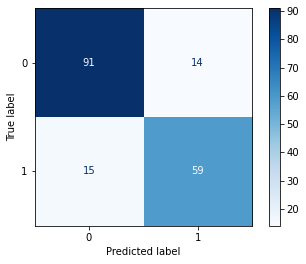

In [520]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
df_train, df_test = list(map(preprocess, load_dataset()))
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['Survived']),
                                                    df_train['Survived'],
                                                    test_size=0.2, random_state=42)

best_param = {'n_estimators': 400,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'criterion': 'gini'}
rf = RandomForestClassifier(oob_score=True, **best_param)
rf.fit(X_train, y_train)
plot = plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

In [518]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

preds = rf.predict(X_test)
print(f"acc: {accuracy_score(y_test, preds)}")
print(f"prec: {precision_score(y_test, preds)}")
print(f"rec: {recall_score(y_test, preds)}")
print(f"f1: {f1_score(y_test, preds)}")

acc: 0.8324022346368715
prec: 0.8055555555555556
rec: 0.7837837837837838
f1: 0.7945205479452055


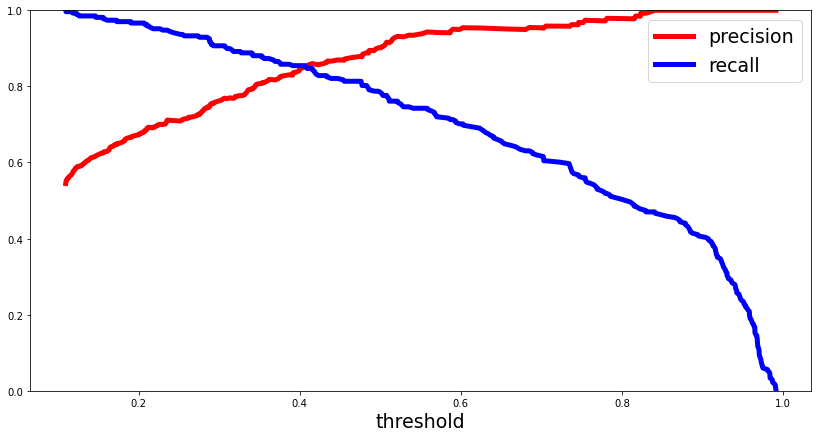

In [522]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

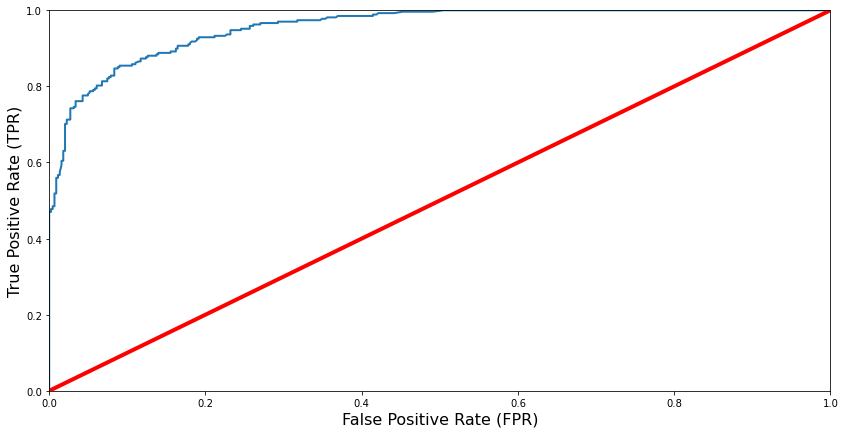

In [523]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [524]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9557533279548206


In [528]:
df = preprocess(load_dataset()[0])

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,Alone,Title
0,0,0,2,1,22.000000,1,0,7.2500,8,2,1,0,2
1,1,1,0,0,38.000000,1,0,71.2833,2,0,1,0,3
2,2,1,2,0,26.000000,0,0,7.9250,8,2,0,1,1
3,3,1,0,0,35.000000,1,0,53.1000,2,2,1,0,3
4,4,0,2,1,35.000000,0,0,8.0500,8,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,1,27.000000,0,0,13.0000,8,2,0,1,2
887,887,1,0,0,19.000000,0,0,30.0000,1,2,0,1,1
888,888,0,2,0,20.671875,1,2,23.4500,8,2,3,0,1
889,889,1,0,1,26.000000,0,0,30.0000,2,0,0,1,2
